In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import KNNImputer
from sklearn.cluster import KMeans

df = pd.read_csv('data.csv')
values1 = 1.1
values2 = 'Performance'
values3 = 'premium unleaded (required)'
values4 = 2.0
df['Engine Cylinders'] = df['Engine Cylinders'].fillna(value=values1)
df['Engine HP'] = df['Engine HP'].fillna(0)
df['Market Category'] = df['Market Category'].fillna(value = values2)
df['Engine Fuel Type'] = df['Engine Fuel Type'].fillna(value = values3)
df['Number of Doors'] = df['Number of Doors'].fillna(value = values4)
df.head(5)

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


добавляем новый атрибут рекомендованной цены в рублях

In [3]:
df['MSRP in RUB'] = df['MSRP'] * 108.13
df

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP,MSRP in RUB
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135,4988577.55
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650,4395484.50
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350,3930525.50
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450,3184428.50
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500,3730485.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11909,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,46120,4986955.60
11910,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,56670,6127727.10
11911,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50620,5473540.60
11912,Acura,ZDX,2013,premium unleaded (recommended),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50920,5505979.60


In [4]:
df[df.duplicated()]

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP,MSRP in RUB
14,BMW,1 Series,2013,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,19,3916,31500,3406095.00
18,Audi,100,1992,regular unleaded,172.0,6.0,MANUAL,front wheel drive,4.0,Luxury,Midsize,Sedan,24,17,3105,2000,216260.00
20,Audi,100,1992,regular unleaded,172.0,6.0,MANUAL,front wheel drive,4.0,Luxury,Midsize,Sedan,24,17,3105,2000,216260.00
24,Audi,100,1993,regular unleaded,172.0,6.0,MANUAL,front wheel drive,4.0,Luxury,Midsize,Sedan,24,17,3105,2000,216260.00
25,Audi,100,1993,regular unleaded,172.0,6.0,MANUAL,front wheel drive,4.0,Luxury,Midsize,Sedan,24,17,3105,2000,216260.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11481,Suzuki,X-90,1998,regular unleaded,95.0,4.0,MANUAL,four wheel drive,2.0,Performance,Compact,2dr SUV,26,22,481,2000,216260.00
11603,Volvo,XC60,2017,regular unleaded,302.0,4.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Luxury,Performance",Midsize,4dr SUV,29,20,870,46350,5011825.50
11604,Volvo,XC60,2017,regular unleaded,240.0,4.0,AUTOMATIC,front wheel drive,4.0,"Crossover,Luxury",Midsize,4dr SUV,30,23,870,40950,4427923.50
11708,Suzuki,XL7,2008,regular unleaded,252.0,6.0,AUTOMATIC,all wheel drive,4.0,Crossover,Midsize,4dr SUV,22,15,481,29149,3151881.37


дубликаты есть

In [6]:
df.drop_duplicates()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP,MSRP in RUB
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135,4988577.55
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650,4395484.50
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350,3930525.50
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450,3184428.50
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500,3730485.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11909,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,46120,4986955.60
11910,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,56670,6127727.10
11911,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50620,5473540.60
11912,Acura,ZDX,2013,premium unleaded (recommended),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50920,5505979.60


In [7]:
df.isna().sum()

Make                 0
Model                0
Year                 0
Engine Fuel Type     0
Engine HP            0
Engine Cylinders     0
Transmission Type    0
Driven_Wheels        0
Number of Doors      0
Market Category      0
Vehicle Size         0
Vehicle Style        0
highway MPG          0
city mpg             0
Popularity           0
MSRP                 0
MSRP in RUB          0
dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Make               11914 non-null  object 
 1   Model              11914 non-null  object 
 2   Year               11914 non-null  int64  
 3   Engine Fuel Type   11914 non-null  object 
 4   Engine HP          11914 non-null  float64
 5   Engine Cylinders   11914 non-null  float64
 6   Transmission Type  11914 non-null  object 
 7   Driven_Wheels      11914 non-null  object 
 8   Number of Doors    11914 non-null  float64
 9   Market Category    11914 non-null  object 
 10  Vehicle Size       11914 non-null  object 
 11  Vehicle Style      11914 non-null  object 
 12  highway MPG        11914 non-null  int64  
 13  city mpg           11914 non-null  int64  
 14  Popularity         11914 non-null  int64  
 15  MSRP               11914 non-null  int64  
 16  MSRP in RUB        119

In [9]:
df_num = df.select_dtypes('float64')
df_num.head(10)

,Engine HP,Engine Cylinders,Number of Doors,MSRP in RUB
0,335.0,6.0,2.0,4988577.55
1,300.0,6.0,2.0,4395484.50
2,300.0,6.0,2.0,3930525.50
3,230.0,6.0,2.0,3184428.50
4,230.0,6.0,2.0,3730485.00
5,230.0,6.0,2.0,3373656.00
6,300.0,6.0,2.0,4768533.00
7,300.0,6.0,2.0,4249509.00
8,230.0,6.0,2.0,3989997.00
9,230.0,6.0,2.0,4022436.00


In [10]:
df_std = pd.DataFrame()
for col in df_num.columns:
  m = df_num[col].mean()
  s = df_num[col].std()
  df_std[col + '_n'] = (df_num[col] - m)/s
df_std.head(10)

,Engine HP_n,Engine Cylinders_n,Number of Doors_n,MSRP in RUB_n
0,0.787803,0.213402,-1.62799,0.092170
1,0.471083,0.213402,-1.62799,0.000919
2,0.471083,0.213402,-1.62799,-0.070617
3,-0.162358,0.213402,-1.62799,-0.185408
4,-0.162358,0.213402,-1.62799,-0.101395
5,-0.162358,0.213402,-1.62799,-0.156295
6,0.471083,0.213402,-1.62799,0.058315
7,0.471083,0.213402,-1.62799,-0.021540
8,-0.162358,0.213402,-1.62799,-0.061467
9,-0.162358,0.213402,-1.62799,-0.056476


C:\Users\artem\AppData\Local\Temp\ipykernel_14760\659195229.py:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(df_std.columns)


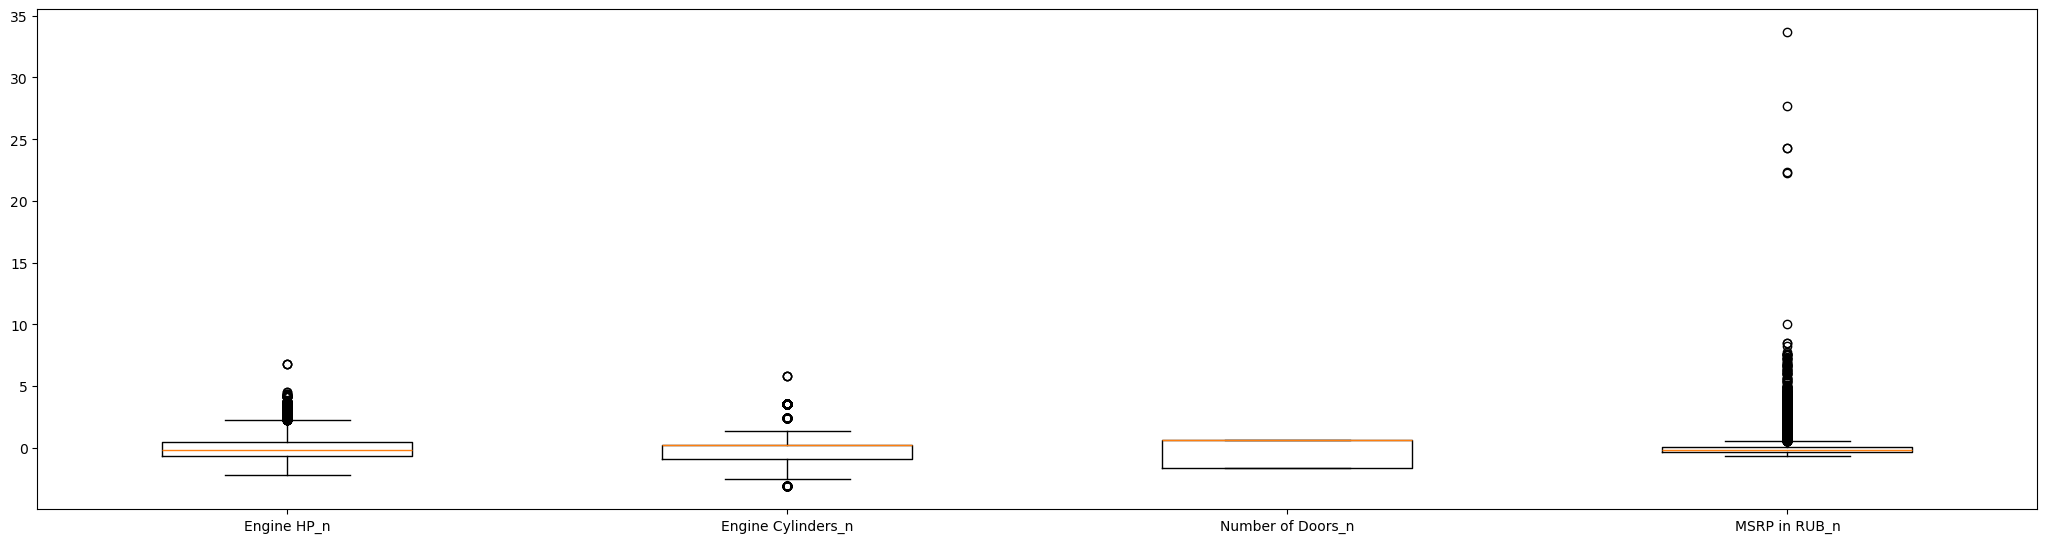

In [11]:
fig = plt.figure(figsize = (20, 5))
ax = fig.add_axes([0, 0, 1, 1])
ax.set_xticklabels(df_std.columns)

data = []
for col in df_std.columns:
  data.append(df_std[col])

bp = ax.boxplot(data, widths=0.5)
plt.show()

In [12]:
df['Engine HP'].describe()

count    11914.000000
mean       247.941749
std        110.507669
min          0.000000
25%        170.000000
50%        225.000000
75%        300.000000
max       1001.000000
Name: Engine HP, dtype: float64

In [13]:
df[df['Engine HP'] == df['Engine HP'].max()]

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP,MSRP in RUB
11362,Bugatti,Veyron 16.4,2008,premium unleaded (required),1001.0,16.0,AUTOMATED_MANUAL,all wheel drive,2.0,"Exotic,High-Performance",Compact,Coupe,14,8,820,2065902,2.233860e+08
11363,Bugatti,Veyron 16.4,2008,premium unleaded (required),1001.0,16.0,AUTOMATED_MANUAL,all wheel drive,2.0,"Exotic,High-Performance",Compact,Coupe,14,8,820,1500000,1.621950e+08
11364,Bugatti,Veyron 16.4,2009,premium unleaded (required),1001.0,16.0,AUTOMATED_MANUAL,all wheel drive,2.0,"Exotic,High-Performance",Compact,Coupe,14,8,820,1705769,1.844448e+08


In [14]:
df[df['Engine HP'] == df['Engine HP'].min()]

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP,MSRP in RUB
539,FIAT,500e,2015,electric,0.0,0.0,DIRECT_DRIVE,front wheel drive,2.0,Hatchback,Compact,2dr Hatchback,108,122,819,31800,3438534.00
540,FIAT,500e,2016,electric,0.0,0.0,DIRECT_DRIVE,front wheel drive,2.0,Hatchback,Compact,2dr Hatchback,103,121,819,31800,3438534.00
541,FIAT,500e,2017,electric,0.0,0.0,DIRECT_DRIVE,front wheel drive,2.0,Hatchback,Compact,2dr Hatchback,103,121,819,31800,3438534.00
2905,Lincoln,Continental,2017,premium unleaded (recommended),0.0,6.0,AUTOMATIC,all wheel drive,4.0,Luxury,Large,Sedan,25,17,61,55915,6046088.95
2906,Lincoln,Continental,2017,premium unleaded (recommended),0.0,6.0,AUTOMATIC,front wheel drive,4.0,Luxury,Large,Sedan,27,18,61,62915,6802998.95
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9850,Kia,Soul EV,2015,electric,0.0,0.0,DIRECT_DRIVE,front wheel drive,4.0,Performance,Compact,Wagon,92,120,1720,35700,3860241.00
9851,Kia,Soul EV,2015,electric,0.0,0.0,DIRECT_DRIVE,front wheel drive,4.0,Performance,Compact,Wagon,92,120,1720,33700,3643981.00
9852,Kia,Soul EV,2016,electric,0.0,0.0,DIRECT_DRIVE,front wheel drive,4.0,Performance,Compact,Wagon,92,120,1720,33950,3671013.50
9853,Kia,Soul EV,2016,electric,0.0,0.0,DIRECT_DRIVE,front wheel drive,4.0,Performance,Compact,Wagon,92,120,1720,31950,3454753.50


In [15]:
df.loc[(df['Engine HP'] == df['Engine HP'].max()), 'Engine HP'] = np.NaN
df.loc[(df['Engine HP'] == df['Engine HP'].min()), 'Engine HP'] = np.NaN
df[df.isna().sum(axis=1) > 0]

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP,MSRP in RUB
539,FIAT,500e,2015,electric,NaN,0.0,DIRECT_DRIVE,front wheel drive,2.0,Hatchback,Compact,2dr Hatchback,108,122,819,31800,3.438534e+06
540,FIAT,500e,2016,electric,NaN,0.0,DIRECT_DRIVE,front wheel drive,2.0,Hatchback,Compact,2dr Hatchback,103,121,819,31800,3.438534e+06
541,FIAT,500e,2017,electric,NaN,0.0,DIRECT_DRIVE,front wheel drive,2.0,Hatchback,Compact,2dr Hatchback,103,121,819,31800,3.438534e+06
2905,Lincoln,Continental,2017,premium unleaded (recommended),NaN,6.0,AUTOMATIC,all wheel drive,4.0,Luxury,Large,Sedan,25,17,61,55915,6.046089e+06
2906,Lincoln,Continental,2017,premium unleaded (recommended),NaN,6.0,AUTOMATIC,front wheel drive,4.0,Luxury,Large,Sedan,27,18,61,62915,6.802999e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9853,Kia,Soul EV,2016,electric,NaN,0.0,DIRECT_DRIVE,front wheel drive,4.0,Performance,Compact,Wagon,92,120,1720,31950,3.454754e+06
9854,Kia,Soul EV,2016,electric,NaN,0.0,DIRECT_DRIVE,front wheel drive,4.0,Performance,Compact,Wagon,92,120,1720,35950,3.887274e+06
11362,Bugatti,Veyron 16.4,2008,premium unleaded (required),NaN,16.0,AUTOMATED_MANUAL,all wheel drive,2.0,"Exotic,High-Performance",Compact,Coupe,14,8,820,2065902,2.233860e+08
11363,Bugatti,Veyron 16.4,2008,premium unleaded (required),NaN,16.0,AUTOMATED_MANUAL,all wheel drive,2.0,"Exotic,High-Performance",Compact,Coupe,14,8,820,1500000,1.621950e+08


In [16]:
df['Engine HP'].describe()

count    11842.000000
mean       249.195660
std        108.548246
min         55.000000
25%        170.000000
50%        227.000000
75%        300.000000
max        750.000000
Name: Engine HP, dtype: float64

In [17]:
df[df['Engine HP'] == df['Engine HP'].max()]

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP,MSRP in RUB
1629,Lamborghini,Aventador,2016,premium unleaded (required),750.0,12.0,AUTOMATED_MANUAL,all wheel drive,2.0,"Exotic,High-Performance",Midsize,Convertible,18,11,1158,535500,57903615.0
1630,Lamborghini,Aventador,2016,premium unleaded (required),750.0,12.0,AUTOMATED_MANUAL,all wheel drive,2.0,"Exotic,High-Performance",Midsize,Coupe,18,11,1158,490700,53059391.0


In [18]:
df.loc[(df['Engine HP'] == df['Engine HP'].max()), 'Engine HP'] = np.NaN
df[df.isna().sum(axis=1) > 0]

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP,MSRP in RUB
539,FIAT,500e,2015,electric,NaN,0.0,DIRECT_DRIVE,front wheel drive,2.0,Hatchback,Compact,2dr Hatchback,108,122,819,31800,3.438534e+06
540,FIAT,500e,2016,electric,NaN,0.0,DIRECT_DRIVE,front wheel drive,2.0,Hatchback,Compact,2dr Hatchback,103,121,819,31800,3.438534e+06
541,FIAT,500e,2017,electric,NaN,0.0,DIRECT_DRIVE,front wheel drive,2.0,Hatchback,Compact,2dr Hatchback,103,121,819,31800,3.438534e+06
1629,Lamborghini,Aventador,2016,premium unleaded (required),NaN,12.0,AUTOMATED_MANUAL,all wheel drive,2.0,"Exotic,High-Performance",Midsize,Convertible,18,11,1158,535500,5.790362e+07
1630,Lamborghini,Aventador,2016,premium unleaded (required),NaN,12.0,AUTOMATED_MANUAL,all wheel drive,2.0,"Exotic,High-Performance",Midsize,Coupe,18,11,1158,490700,5.305939e+07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9853,Kia,Soul EV,2016,electric,NaN,0.0,DIRECT_DRIVE,front wheel drive,4.0,Performance,Compact,Wagon,92,120,1720,31950,3.454754e+06
9854,Kia,Soul EV,2016,electric,NaN,0.0,DIRECT_DRIVE,front wheel drive,4.0,Performance,Compact,Wagon,92,120,1720,35950,3.887274e+06
11362,Bugatti,Veyron 16.4,2008,premium unleaded (required),NaN,16.0,AUTOMATED_MANUAL,all wheel drive,2.0,"Exotic,High-Performance",Compact,Coupe,14,8,820,2065902,2.233860e+08
11363,Bugatti,Veyron 16.4,2008,premium unleaded (required),NaN,16.0,AUTOMATED_MANUAL,all wheel drive,2.0,"Exotic,High-Performance",Compact,Coupe,14,8,820,1500000,1.621950e+08


In [19]:
df['Engine HP'].describe()

count    11840.000000
mean       249.111064
std        108.362059
min         55.000000
25%        170.000000
50%        227.000000
75%        300.000000
max        731.000000
Name: Engine HP, dtype: float64

In [20]:
df_num = df.select_dtypes('float64')
imputer = KNNImputer(n_neighbors=5, weights='uniform')
imputer.fit(df_num)
df_num = pd.DataFrame(imputer.transform(df_num), index=df_num.index, columns=df_num.columns)
df['Engine HP'] = df_num['Engine HP']
df['Engine HP'].describe()

count    11914.000000
mean       249.553718
std        108.603249
min         55.000000
25%        170.000000
50%        227.000000
75%        300.000000
max        731.000000
Name: Engine HP, dtype: float64

In [21]:
df.loc[[539]]

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP,MSRP in RUB
539,FIAT,500e,2015,electric,237.2,0.0,DIRECT_DRIVE,front wheel drive,2.0,Hatchback,Compact,2dr Hatchback,108,122,819,31800,3438534.0


C:\Users\artem\AppData\Local\Temp\ipykernel_14760\2967847061.py:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(df_std.columns)


<Figure size 2000x500 with 0 Axes>

<Figure size 2000x500 with 0 Axes>

<Figure size 2000x500 with 0 Axes>

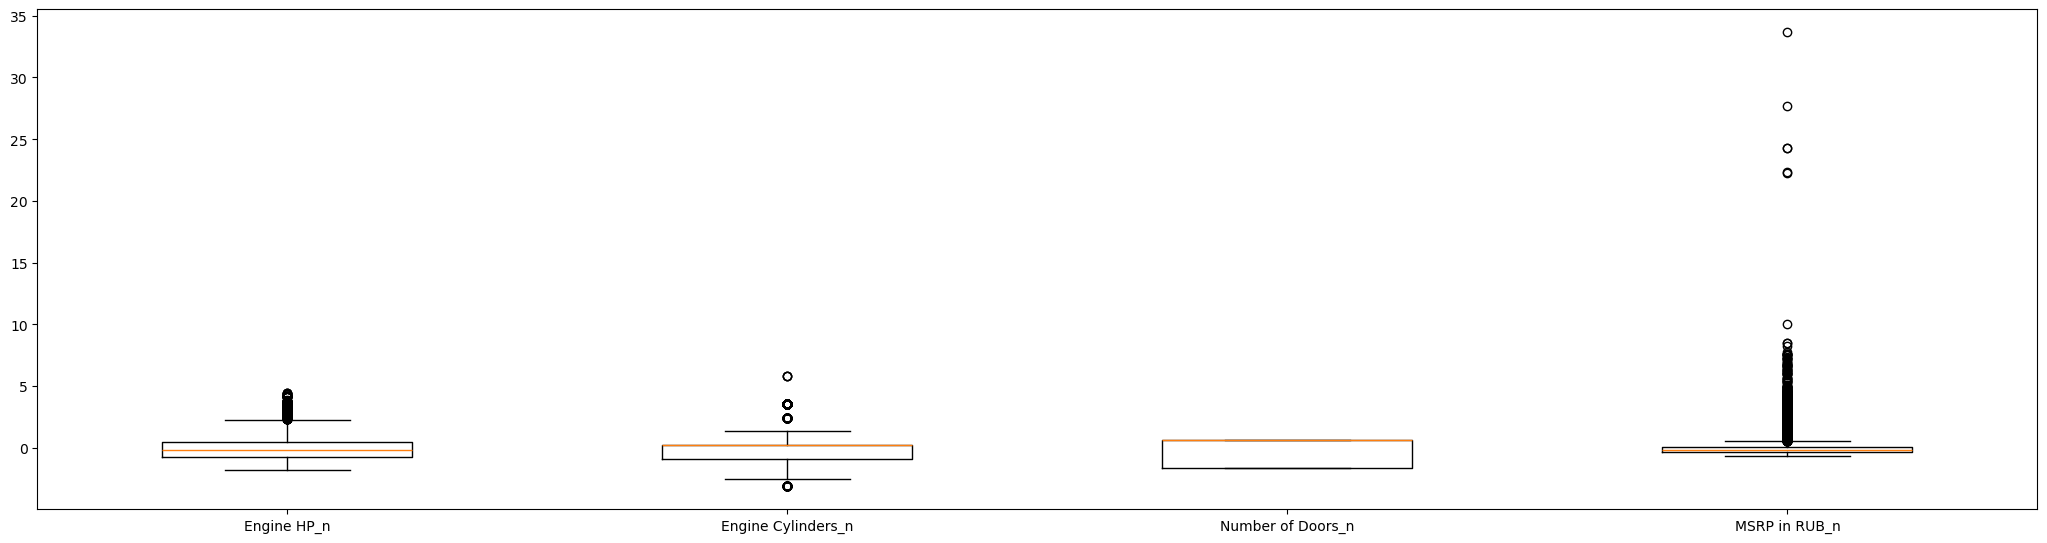

In [22]:
df_std = pd.DataFrame()
for col in df_num.columns:
  m = df_num[col].mean()
  s = df_num[col].std()
  df_std[col + '_n'] = (df_num[col] - m)/s

  fig = plt.figure(figsize = (20, 5))
ax = fig.add_axes([0, 0, 1, 1])
ax.set_xticklabels(df_std.columns)

data = []
for col in df_std.columns:
  data.append(df_std[col])

bp = ax.boxplot(data, widths=0.5)
plt.show()

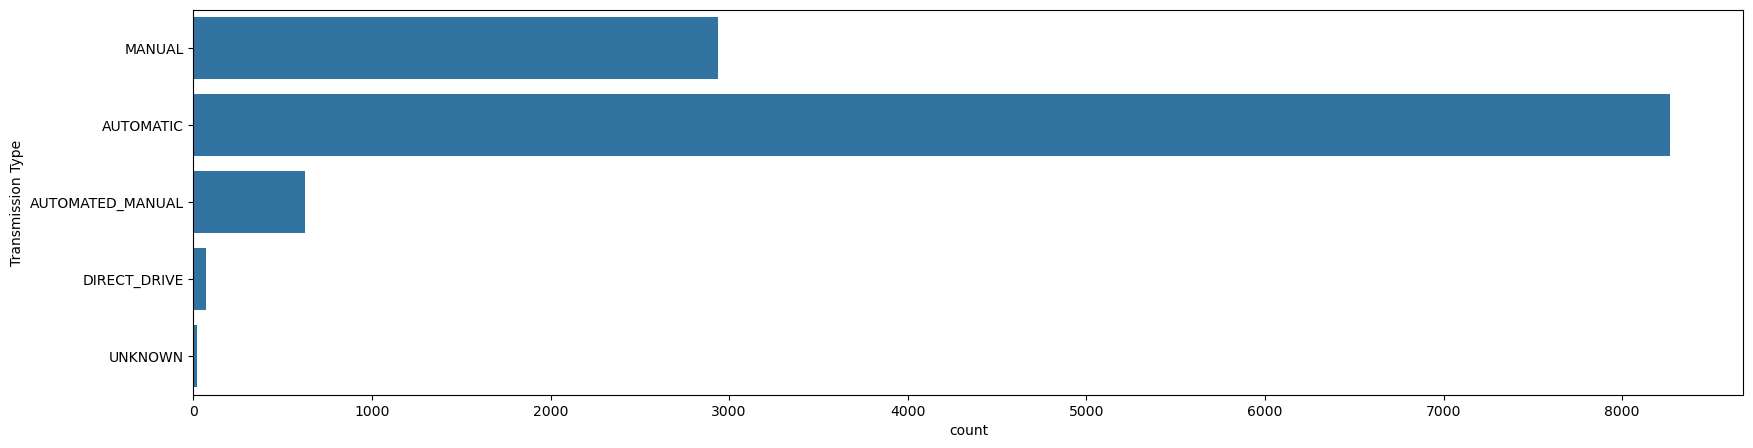

In [23]:
plt.figure(1 , figsize = (20 , 5))
sns.countplot(y = 'Transmission Type' , data = df)
plt.show()

Engine HP	 Engine Cylinders	 highway MPG	 city mpg	

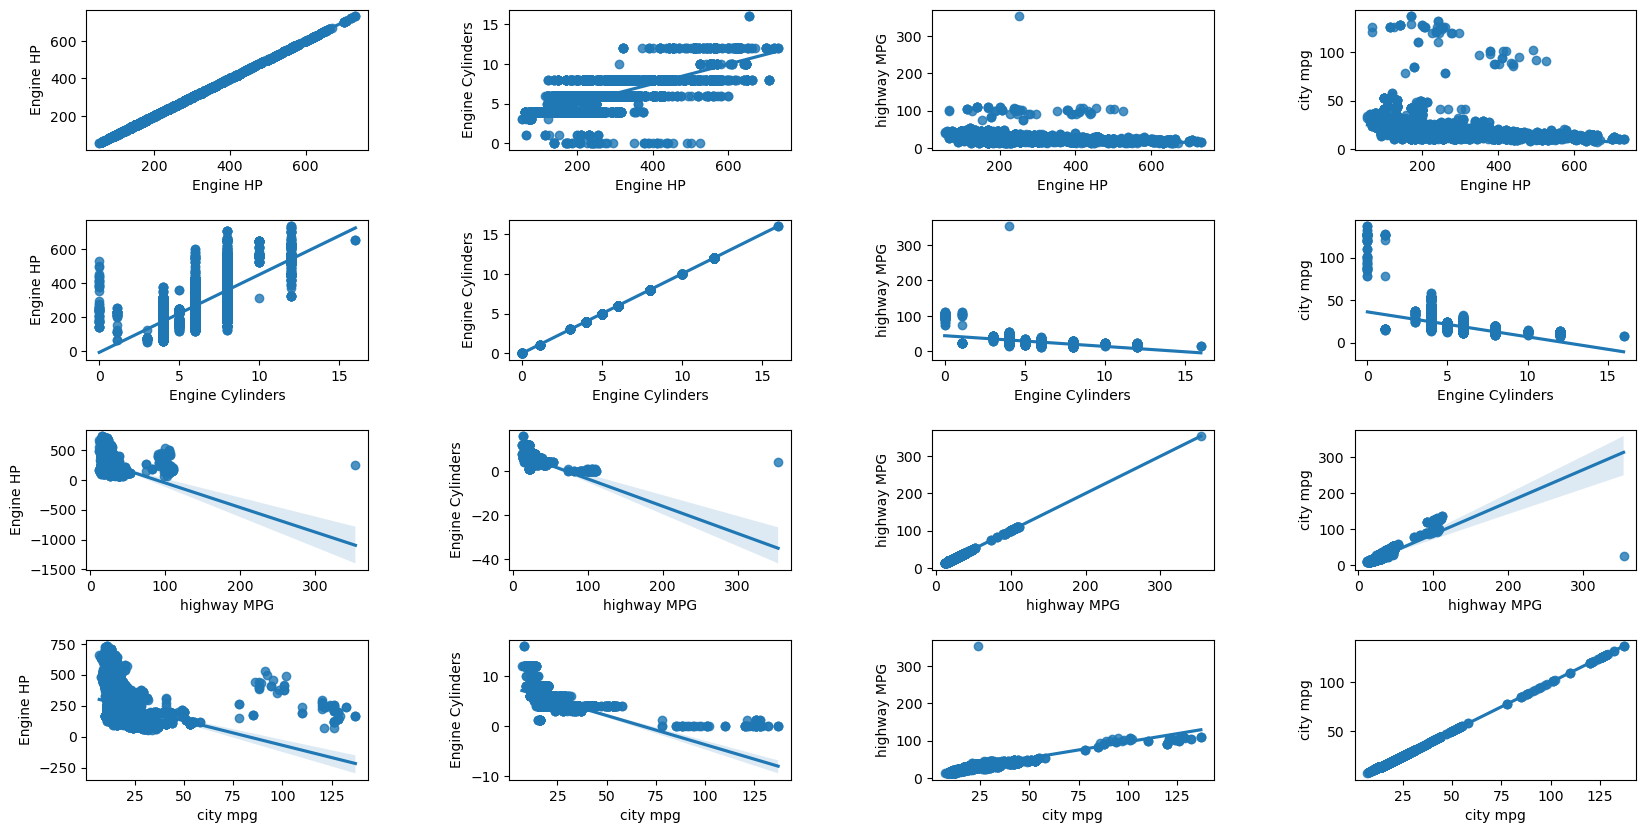

In [25]:
plt.figure(1, figsize = (20 , 10))
n = 0
for x in ['Engine HP', 'Engine Cylinders', 'highway MPG', 'city mpg']:
    for y in ['Engine HP', 'Engine Cylinders', 'highway MPG', 'city mpg']:
        n += 1
        plt.subplot(4, 4, n)
        plt.subplots_adjust(hspace = 0.5, wspace = 0.5)
        sns.regplot(x = x, y = y, data = df)
        plt.ylabel(y.split()[0]+' '+y.split()[1] if len(y.split()) > 1 else y)
plt.show()

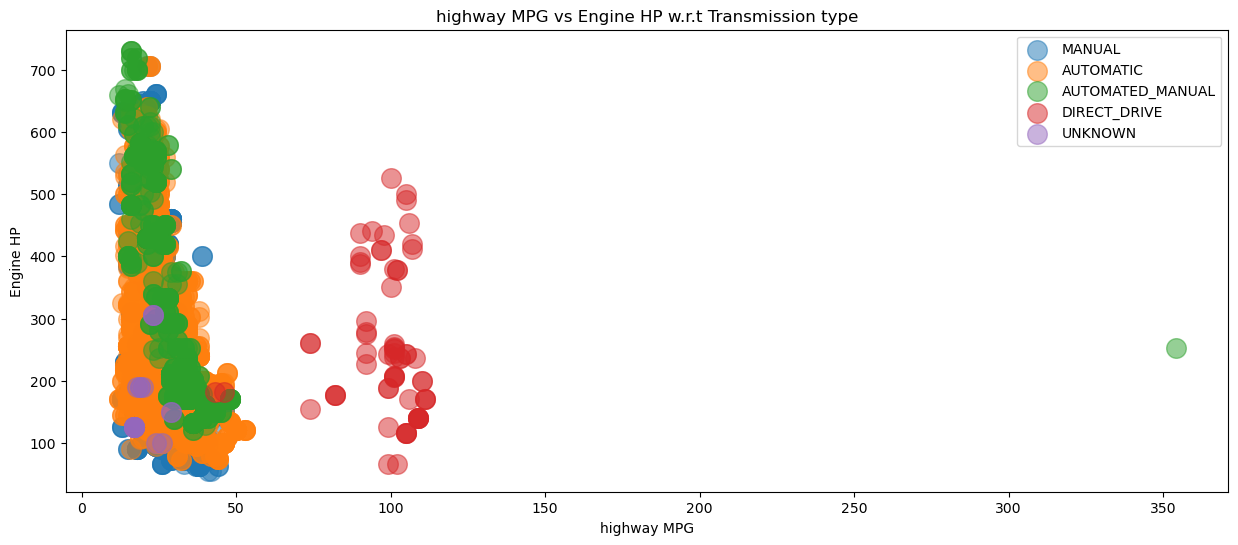

In [26]:
plt.figure(1, figsize = (15, 6))
for type in ['MANUAL', 'AUTOMATIC', 'AUTOMATED_MANUAL','DIRECT_DRIVE','UNKNOWN']:
    plt.scatter(x = 'highway MPG', y = 'Engine HP', data = df[df['Transmission Type'] == type],
                s = 200, alpha = 0.5, label = type)
plt.xlabel('highway MPG')
plt.ylabel('Engine HP')
plt.title('highway MPG vs Engine HP w.r.t Transmission type')
plt.legend()
plt.show()

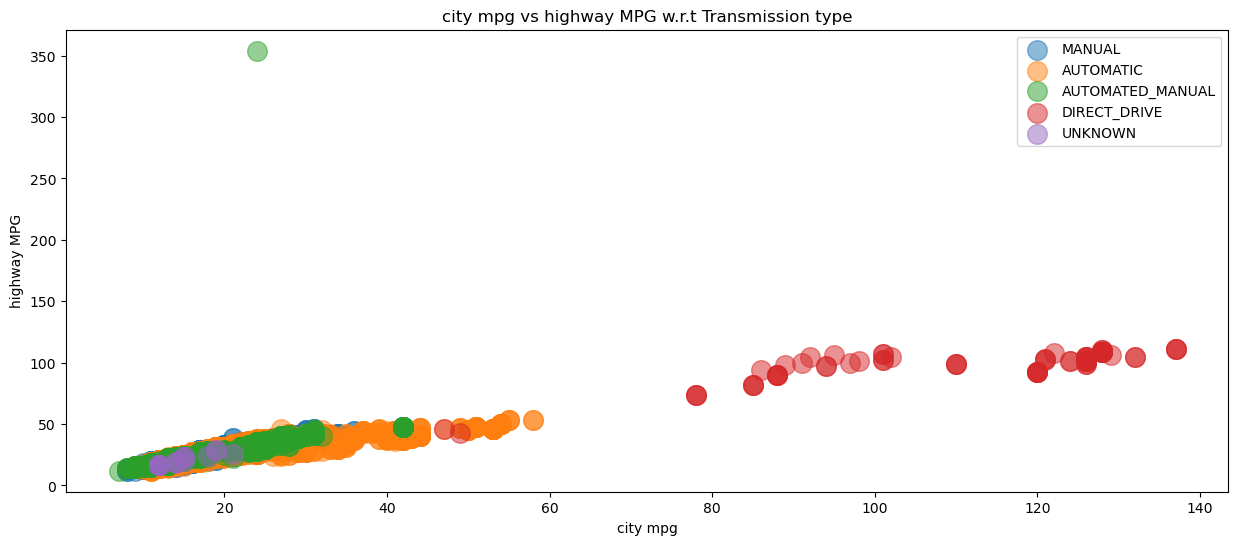

In [27]:
plt.figure(1, figsize = (15, 6))
for type in ['MANUAL', 'AUTOMATIC', 'AUTOMATED_MANUAL','DIRECT_DRIVE','UNKNOWN']:
    plt.scatter(x = 'city mpg', y = 'highway MPG', data = df[df['Transmission Type'] == type],
                s = 200, alpha = 0.5, label = type)
plt.xlabel('city mpg')
plt.ylabel('highway MPG')
plt.title('city mpg vs highway MPG w.r.t Transmission type')
plt.legend()
plt.show()

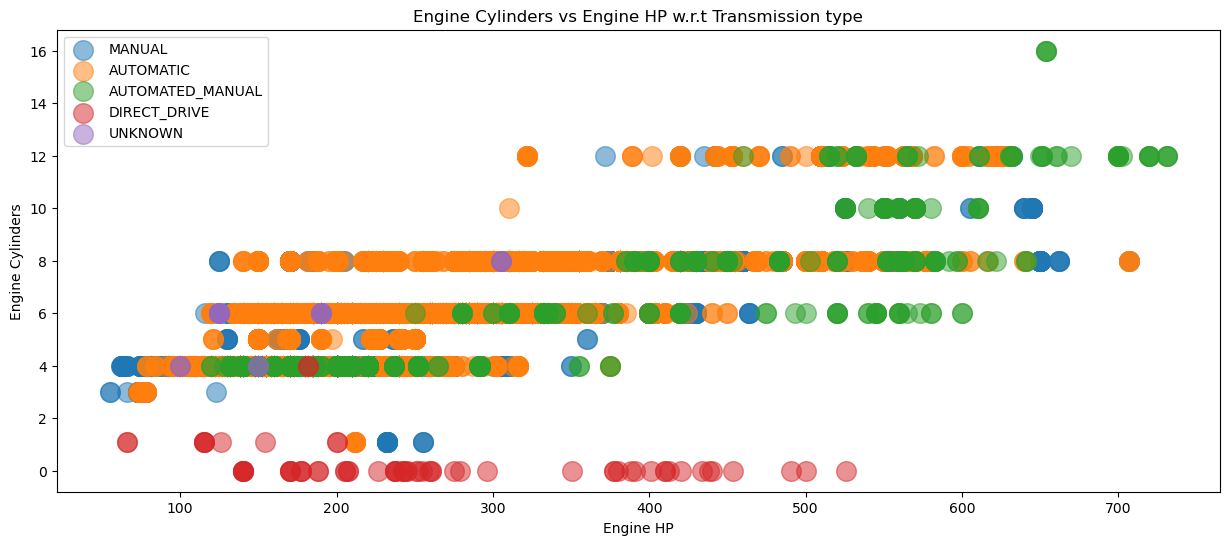

In [28]:
plt.figure(1, figsize = (15, 6))
for type in ['MANUAL', 'AUTOMATIC', 'AUTOMATED_MANUAL','DIRECT_DRIVE','UNKNOWN']:
    plt.scatter(y = 'Engine Cylinders', x = 'Engine HP', data = df[df['Transmission Type'] == type],
                s = 200, alpha = 0.5, label = type)
plt.ylabel('Engine Cylinders')
plt.xlabel('Engine HP')
plt.title('Engine Cylinders vs Engine HP w.r.t Transmission type')
plt.legend()
plt.show()

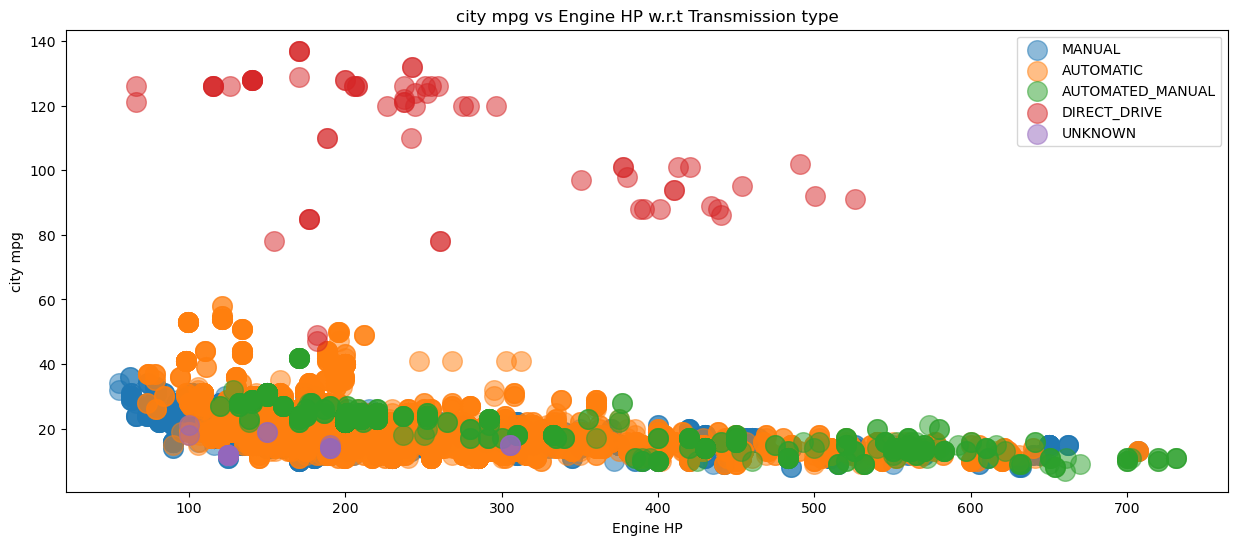

In [29]:
plt.figure(1, figsize = (15, 6))
for type in ['MANUAL', 'AUTOMATIC', 'AUTOMATED_MANUAL','DIRECT_DRIVE','UNKNOWN']:
    plt.scatter(y = 'city mpg', x = 'Engine HP', data = df[df['Transmission Type'] == type],
                s = 200, alpha = 0.5, label = type)
plt.ylabel('city mpg')
plt.xlabel('Engine HP')
plt.title('city mpg vs Engine HP w.r.t Transmission type')
plt.legend()
plt.show()

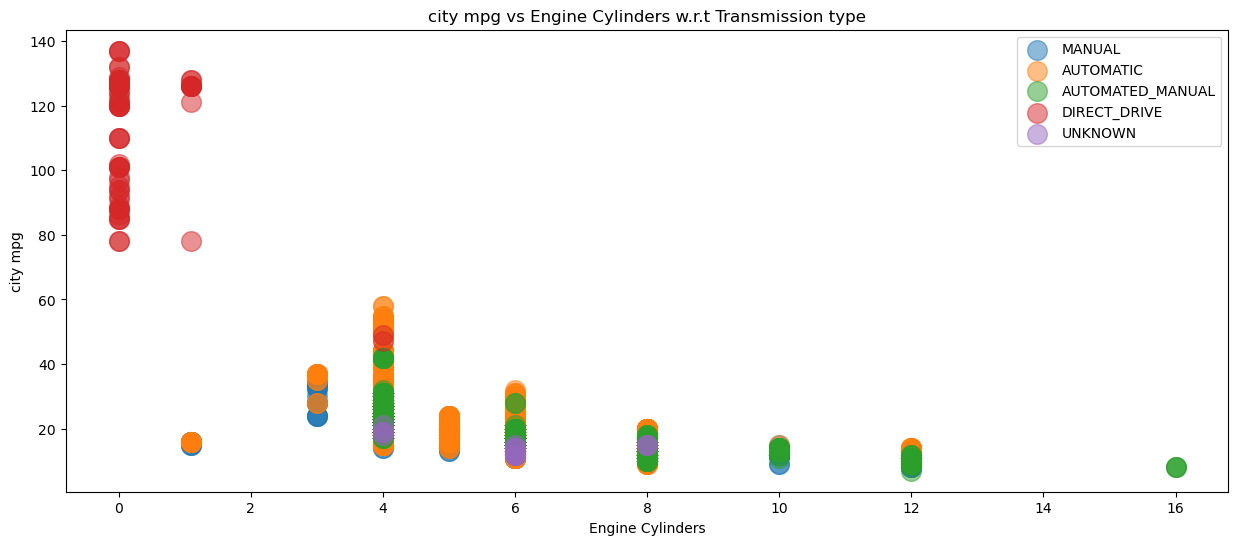

In [30]:
plt.figure(1, figsize = (15, 6))
for type in ['MANUAL', 'AUTOMATIC', 'AUTOMATED_MANUAL','DIRECT_DRIVE','UNKNOWN']:
    plt.scatter(y = 'city mpg', x = 'Engine Cylinders', data = df[df['Transmission Type'] == type],
                s = 200, alpha = 0.5, label = type)
plt.ylabel('city mpg')
plt.xlabel('Engine Cylinders')
plt.title('city mpg vs Engine Cylinders w.r.t Transmission type')
plt.legend()
plt.show()

Расход топлива на один галон и мощность двигателя

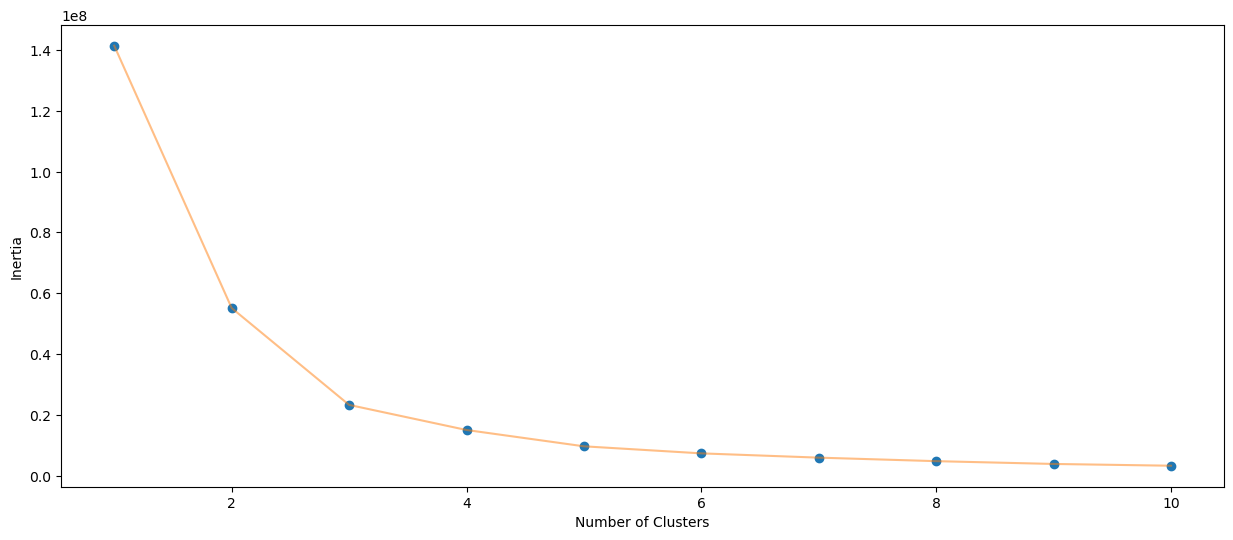

In [32]:
X1 = df[['highway MPG', 'Engine HP']].iloc[: , :].values
inertia = []
for n in range(1 , 11):
    algorithm = (KMeans(n_clusters = n, init='k-means++', n_init = 10, max_iter=300,
                        tol=0.0001,  random_state= 111, algorithm='lloyd') )
    algorithm.fit(X1)
    inertia.append(algorithm.inertia_)

plt.figure(1, figsize = (15, 6))
plt.plot(np.arange(1, 11), inertia, 'o')
plt.plot(np.arange(1, 11), inertia, '-', alpha = 0.5)
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

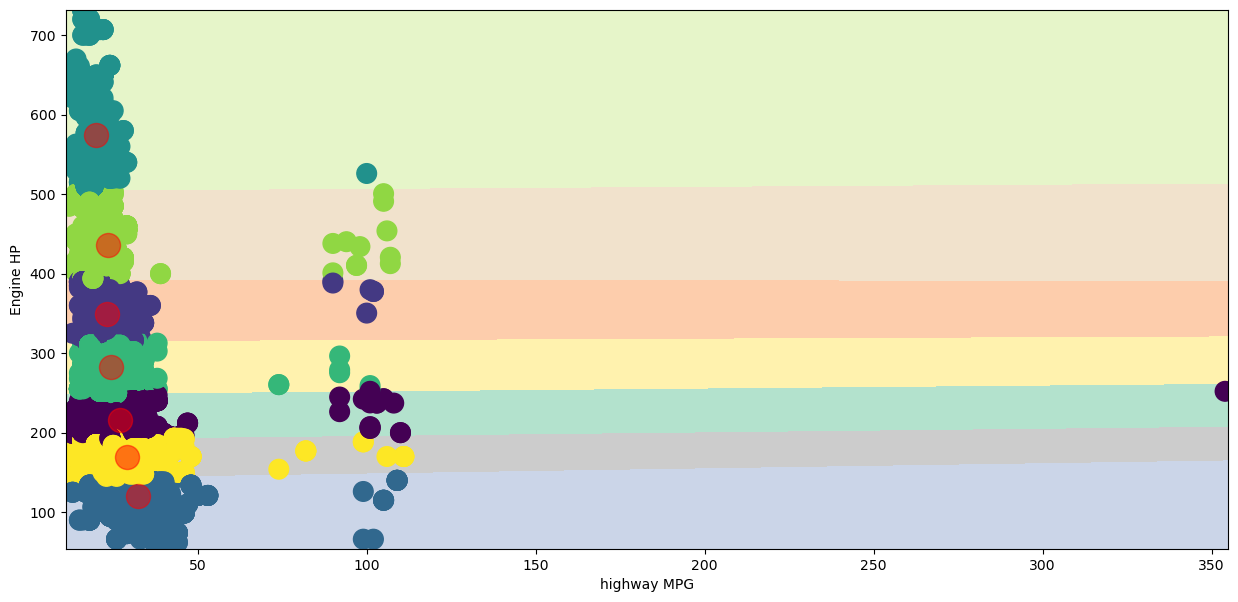

In [33]:
algorithm = (KMeans(n_clusters = 7, init='k-means++', n_init = 10, max_iter = 300,
                        tol=0.0001,  random_state= 111, algorithm='elkan') )
algorithm.fit(X1)
labels1 = algorithm.labels_
centroids1 = algorithm.cluster_centers_

h = 0.02
x_min, x_max = X1[:, 0].min() - 1, X1[:, 0].max() + 1
y_min, y_max = X1[:, 1].min() - 1, X1[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = algorithm.predict(np.c_[xx.ravel(), yy.ravel()])

plt.figure(1, figsize = (15, 7))
plt.clf()
Z = Z.reshape(xx.shape)
plt.imshow(Z, interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap = plt.cm.Pastel2, aspect = 'auto', origin='lower')

plt.scatter( x='highway MPG', y ='Engine HP', data = df, c = labels1, s = 200)
plt.scatter(x = centroids1[: , 0], y = centroids1[: , 1], s = 300, c = 'red', alpha = 0.5)
plt.xlabel('highway MPG')
plt.ylabel('Engine HP')
plt.show()

Расход топлива в городе и на один галон

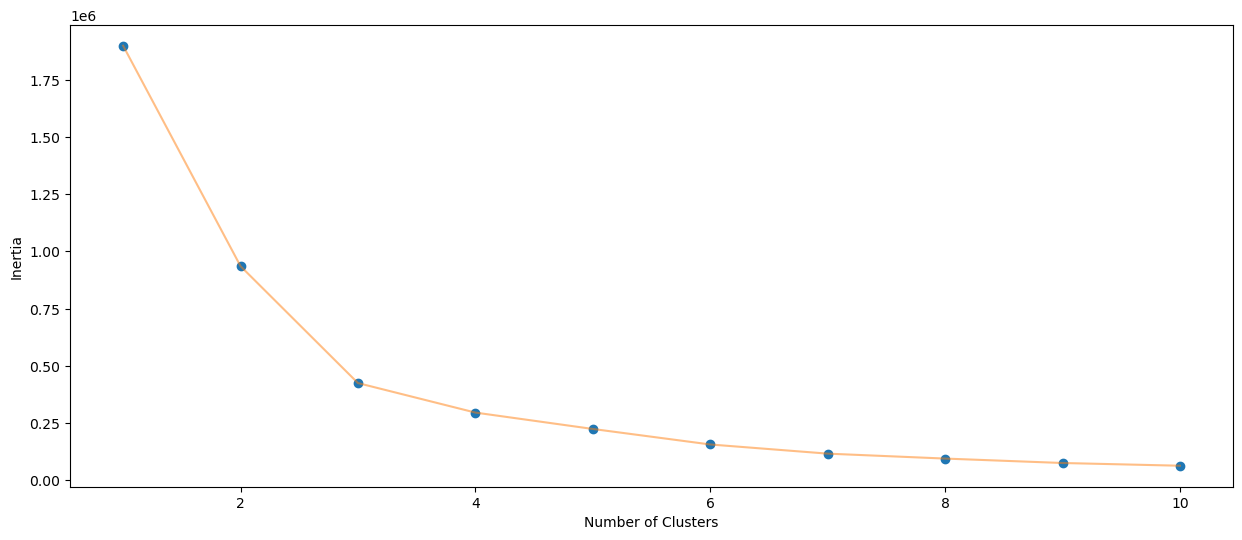

In [35]:
X2 = df[['city mpg', 'highway MPG']].iloc[: , :].values
inertia = []
for n in range(1 , 11):
    algorithm = (KMeans(n_clusters = n, init='k-means++', n_init = 10, max_iter=300,
                        tol=0.0001,  random_state= 111 , algorithm='lloyd'))
    algorithm.fit(X2)
    inertia.append(algorithm.inertia_)

plt.figure(1, figsize = (15, 6))
plt.plot(np.arange(1, 11), inertia, 'o')
plt.plot(np.arange(1, 11), inertia, '-', alpha = 0.5)
plt.xlabel('Number of Clusters'), plt.ylabel('Inertia')
plt.show()

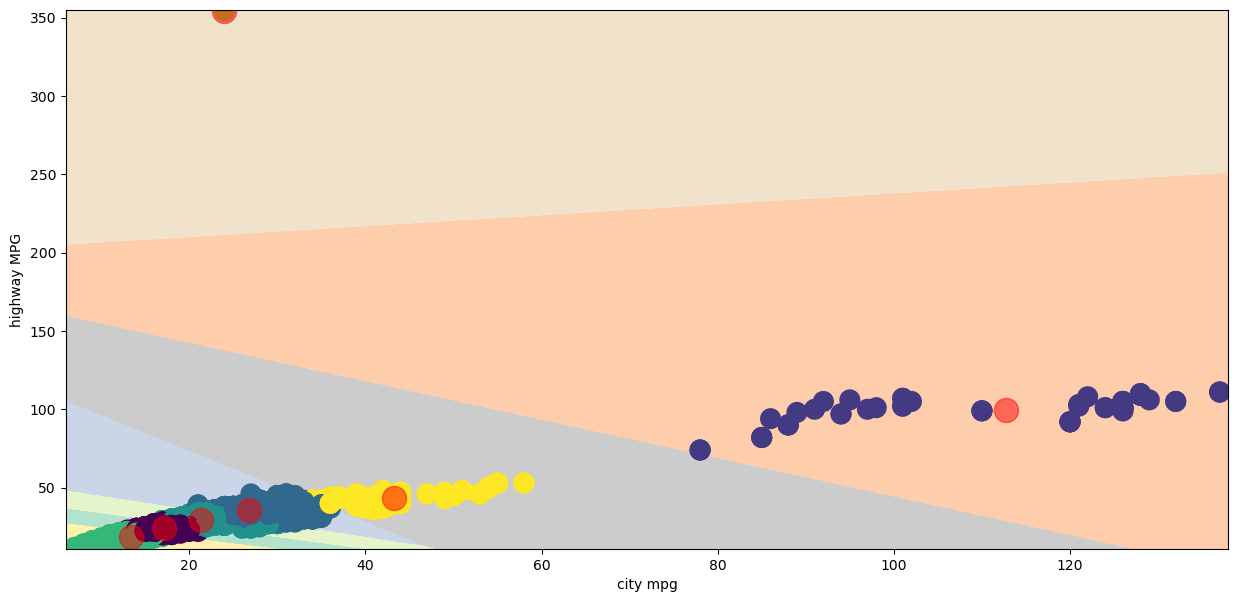

In [36]:
algorithm = (KMeans(n_clusters = 7, init='k-means++', n_init = 10, max_iter=300,
                        tol=0.0001,  random_state= 111 , algorithm='elkan'))
algorithm.fit(X2)
labels2 = algorithm.labels_
centroids2 = algorithm.cluster_centers_

h = 0.02
x_min, x_max = X2[:, 0].min() - 1, X2[:, 0].max() + 1
y_min, y_max = X2[:, 1].min() - 1, X2[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z2 = algorithm.predict(np.c_[xx.ravel(), yy.ravel()])

plt.figure(1, figsize = (15, 7))
plt.clf()
Z2 = Z2.reshape(xx.shape)
plt.imshow(Z2, interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap = plt.cm.Pastel2, aspect = 'auto', origin='lower')

plt.scatter(x = 'city mpg', y = 'highway MPG', data = df, c = labels2, s = 200 )
plt.scatter(x = centroids2[:, 0], y = centroids2[:, 1], s = 300, c = 'red', alpha = 0.5)
plt.xlabel('city mpg')
plt.ylabel('highway MPG')
plt.show()

Расход топлива в городе и цилиндры двигателя

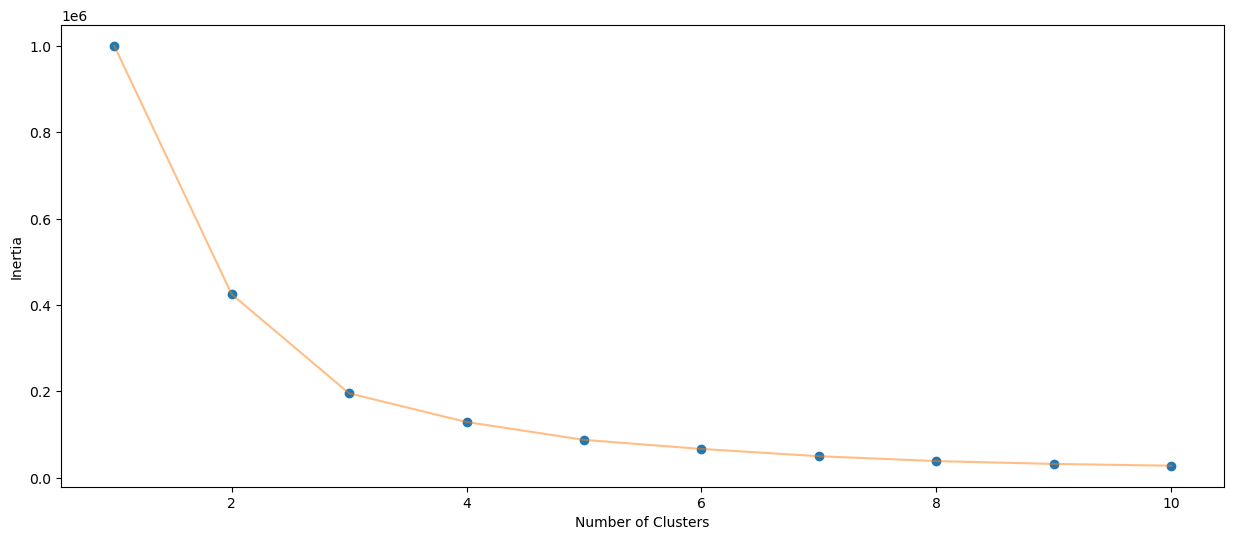

In [38]:
X3 = df[['city mpg', 'Engine Cylinders']].iloc[: , :].values
inertia = []
for n in range(1, 11):
    algorithm = (KMeans(n_clusters = n, init='k-means++', n_init = 10, max_iter=300,
                        tol=0.0001,  random_state= 111 , algorithm='lloyd') )
    algorithm.fit(X3)
    inertia.append(algorithm.inertia_)

plt.figure(1, figsize = (15 ,6))
plt.plot(np.arange(1, 11), inertia, 'o')
plt.plot(np.arange(1, 11), inertia, '-', alpha = 0.5)
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

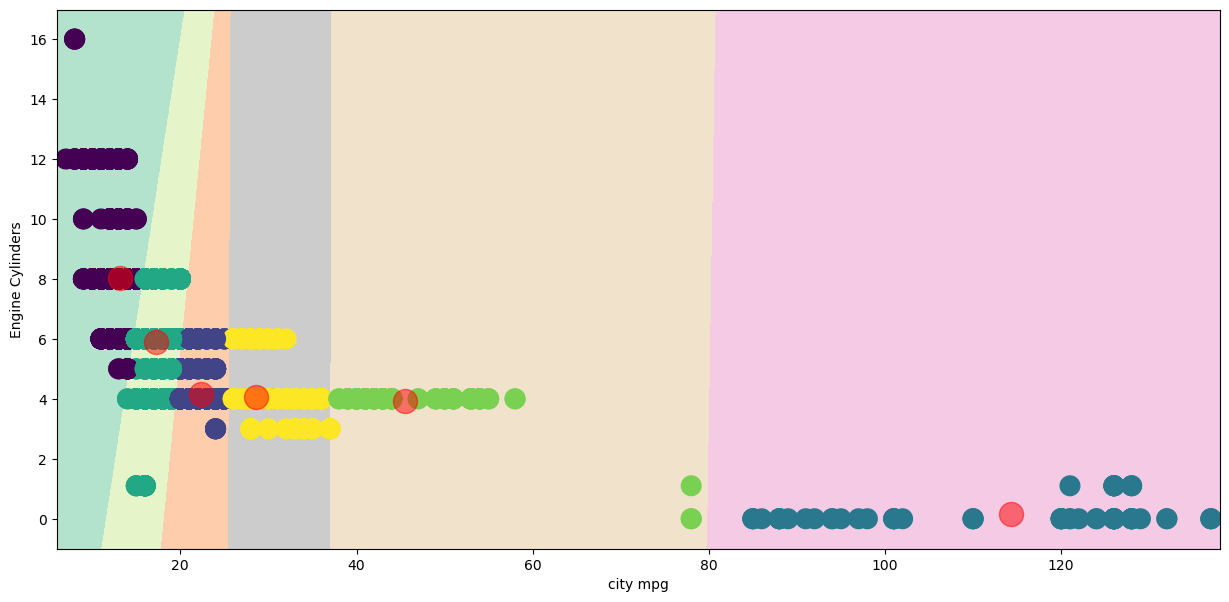

In [39]:
algorithm = (KMeans(n_clusters = 6, init='k-means++', n_init = 10, max_iter=300,
                        tol=0.0001,  random_state= 111, algorithm='elkan'))
algorithm.fit(X3)
labels3 = algorithm.labels_
centroids3 = algorithm.cluster_centers_
h = 0.02
x_min, x_max = X3[:, 0].min() - 1, X3[:, 0].max() + 1
y_min, y_max = X3[:, 1].min() - 1, X3[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z3 = algorithm.predict(np.c_[xx.ravel(), yy.ravel()])

plt.figure(1, figsize = (15, 7))
plt.clf()
Z3 = Z3.reshape(xx.shape)
plt.imshow(Z3, interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap = plt.cm.Pastel2, aspect = 'auto', origin='lower')

plt.scatter(x = 'city mpg', y = 'Engine Cylinders', data = df, c = labels3, s = 200 )
plt.scatter(x = centroids3[:, 0], y = centroids3[:, 1], s = 300, c = 'red', alpha = 0.5)
plt.xlabel('city mpg')
plt.ylabel('Engine Cylinders')
plt.show()

Мощность двигателя и цилиндры двигателя

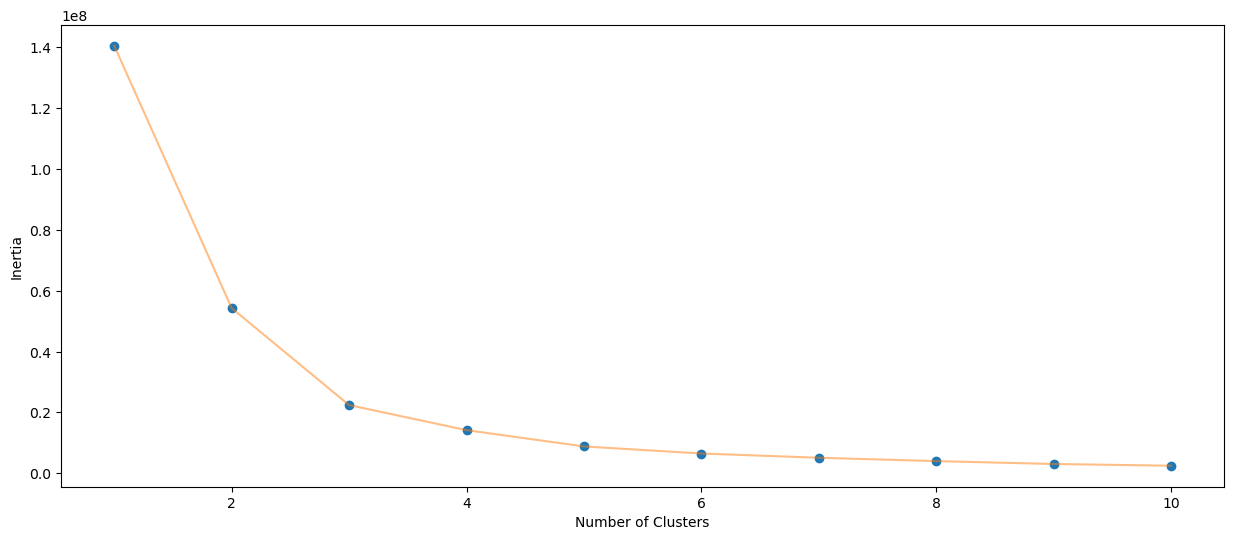

In [41]:
X4 = df[['Engine HP', 'Engine Cylinders']].iloc[: , :].values
inertia = []
for n in range(1 , 11):
    algorithm = (KMeans(n_clusters = n, init='k-means++', n_init = 10, max_iter=300,
                        tol=0.0001,  random_state= 111, algorithm='lloyd') )
    algorithm.fit(X4)
    inertia.append(algorithm.inertia_)

plt.figure(1, figsize = (15, 6))
plt.plot(np.arange(1, 11), inertia, 'o')
plt.plot(np.arange(1, 11), inertia, '-', alpha = 0.5)
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

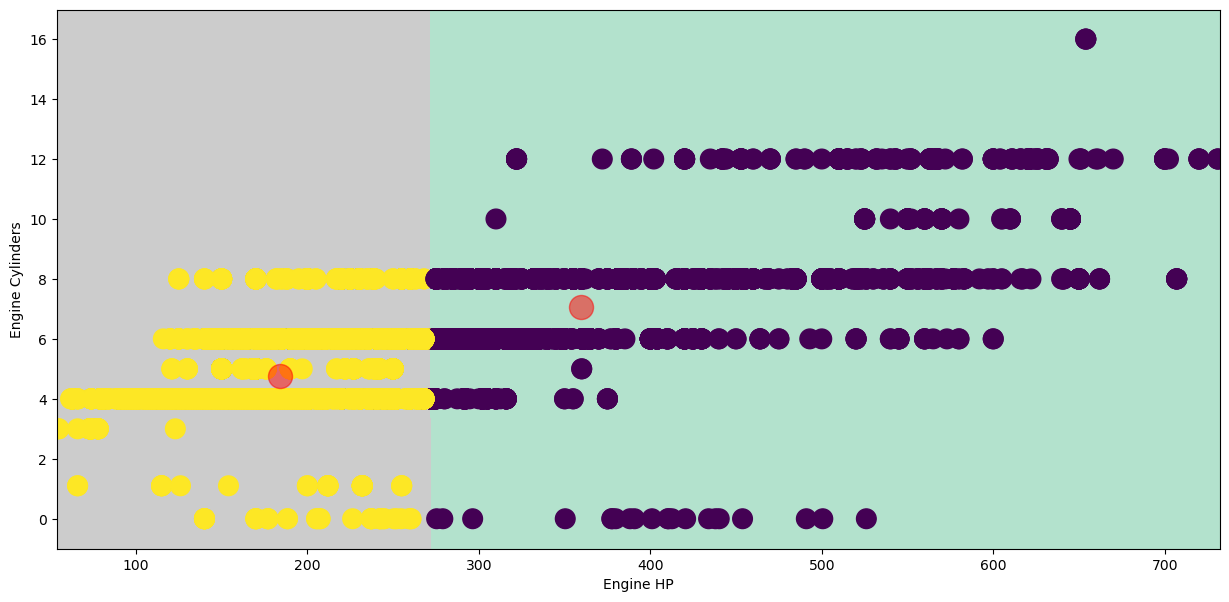

In [42]:
algorithm = (KMeans(n_clusters = 2, init='k-means++', n_init = 10, max_iter=300,
                        tol=0.0001,  random_state= 111, algorithm='elkan') )
algorithm.fit(X4)
labels4 = algorithm.labels_
centroids4 = algorithm.cluster_centers_
h = 0.02
x_min, x_max = X4[:, 0].min() - 1, X4[:, 0].max() + 1
y_min, y_max = X4[:, 1].min() - 1, X4[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z4 = algorithm.predict(np.c_[xx.ravel(), yy.ravel()])

plt.figure(1, figsize = (15, 7))
plt.clf()
Z4 = Z4.reshape(xx.shape)
plt.imshow(Z4, interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap = plt.cm.Pastel2, aspect = 'auto', origin='lower')

plt.scatter(x = 'Engine HP', y = 'Engine Cylinders', data = df, c = labels4, s = 200 )
plt.scatter(x = centroids4[:, 0], y = centroids4[:, 1], s = 300, c = 'red', alpha = 0.5)
plt.xlabel('Engine HP')
plt.ylabel('Engine Cylinders')
plt.show()

Расход топлива в городе и мощность двигателя

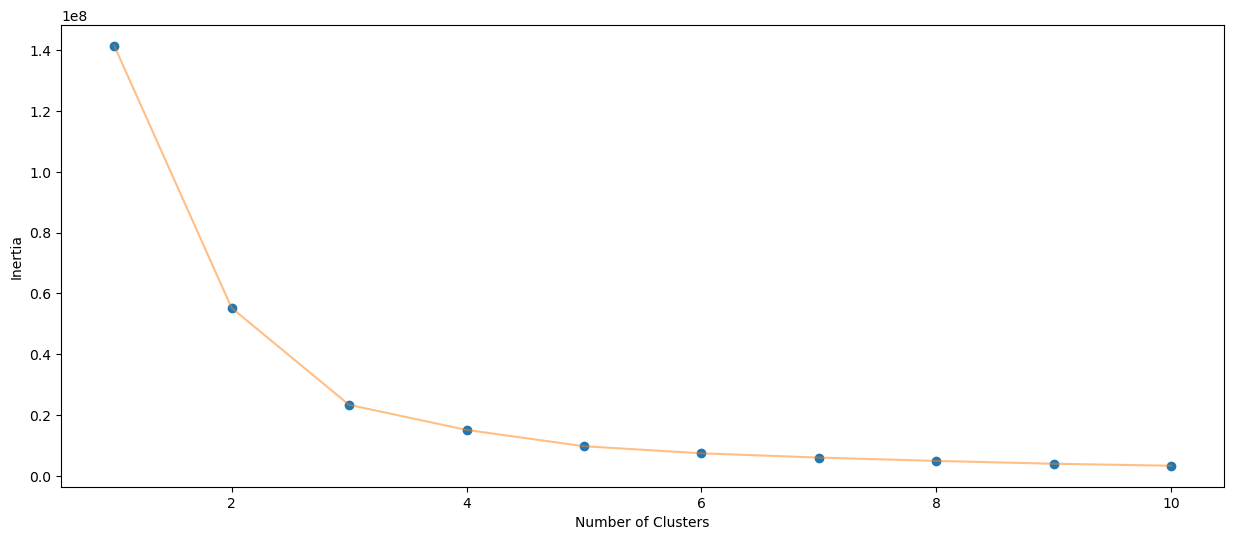

In [44]:
X5 = df[['city mpg', 'Engine HP']].iloc[: , :].values
inertia = []
for n in range(1 , 11):
    algorithm = (KMeans(n_clusters = n, init='k-means++', n_init = 10, max_iter=300,
                        tol=0.0001,  random_state= 111, algorithm='lloyd') )
    algorithm.fit(X5)
    inertia.append(algorithm.inertia_)

plt.figure(1, figsize = (15, 6))
plt.plot(np.arange(1, 11), inertia, 'o')
plt.plot(np.arange(1, 11), inertia, '-', alpha = 0.5)
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

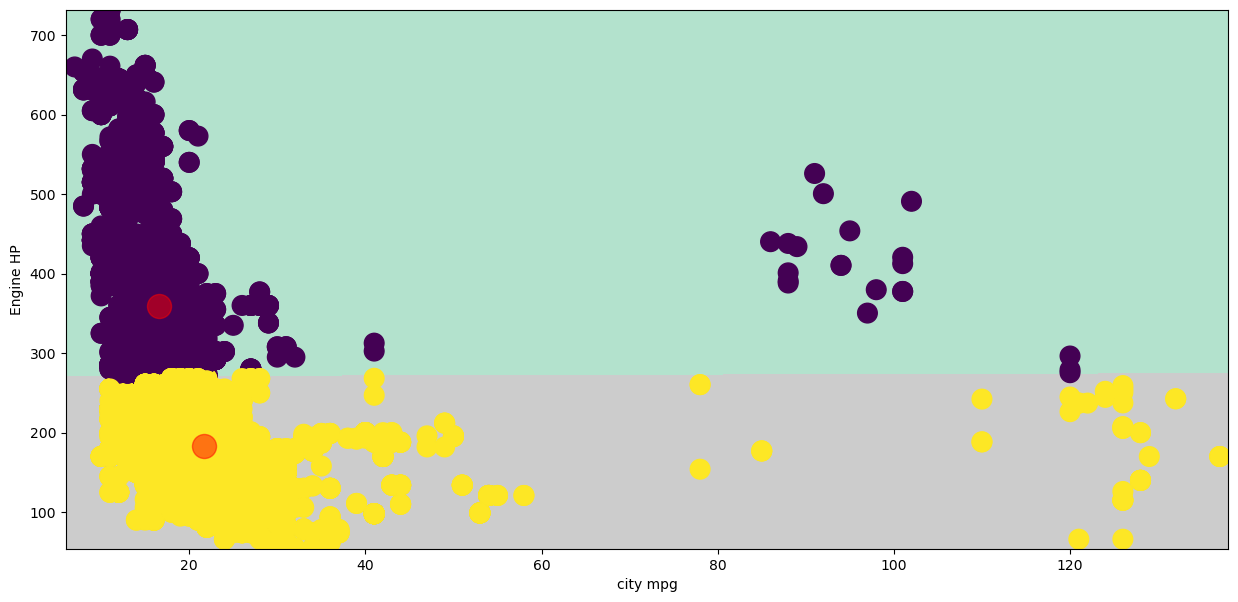

In [45]:
algorithm = (KMeans(n_clusters = 2, init='k-means++', n_init = 10, max_iter=300,
                        tol=0.0001,  random_state= 111, algorithm='elkan') )
algorithm.fit(X5)
labels5 = algorithm.labels_
centroids5 = algorithm.cluster_centers_
h = 0.02
x_min, x_max = X5[:, 0].min() - 1, X5[:, 0].max() + 1
y_min, y_max = X5[:, 1].min() - 1, X5[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z5 = algorithm.predict(np.c_[xx.ravel(), yy.ravel()])

plt.figure(1, figsize = (15, 7))
plt.clf()
Z5 = Z5.reshape(xx.shape)
plt.imshow(Z5, interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap = plt.cm.Pastel2, aspect = 'auto', origin='lower')

plt.scatter(x = 'city mpg', y = 'Engine HP', data = df, c = labels5, s = 200 )
plt.scatter(x = centroids5[:, 0], y = centroids5[:, 1], s = 300, c = 'red', alpha = 0.5)
plt.xlabel('city mpg')
plt.ylabel('Engine HP')
plt.show()